In [98]:
import pandas as pd
import numpy as np

In [99]:
orginalData = pd.read_csv('laptopData.csv')
laptopDF = orginalData.copy()
laptopDF.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [100]:
laptopDF.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## Drop Unnecessary columns

In [101]:

laptopDF= laptopDF.drop(columns = 'Unnamed: 0')
laptopDF.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [102]:
laptopDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [103]:
#Convert all the column names to lowercase
laptopDF.columns = laptopDF.columns.str.lower()
laptopDF.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

### Identify Null Rows

In [104]:
laptopDF.isnull().sum()

company             30
typename            30
inches              30
screenresolution    30
cpu                 30
ram                 30
memory              30
gpu                 30
opsys               30
weight              30
price               30
dtype: int64

### Drop the rows where  all values in that row are NaN (Missing)

In [105]:

laptopDF = laptopDF.dropna(how = 'all')

### Identify duplicate rows

In [106]:
laptopDF.duplicated().sum()

np.int64(29)

In [107]:
laptopDF = laptopDF.drop_duplicates(keep = 'first')

### Check unique values in each column

In [108]:
laptopDF['company'].unique()  

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [109]:
laptopDF['typename'].unique() 

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [110]:
laptopDF['screenresolution'].value_counts()

screenresolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

### Null value count in each column

In [111]:
print(laptopDF['ram'].isnull().sum())

0


### Count how many times each unique value appears in a column

In [112]:
laptopDF['ram'].value_counts()

ram
8GB     595
4GB     358
16GB    192
6GB      34
12GB     25
32GB     17
2GB      16
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

### Filters the laptopDF DataFrame to return only the rows where the 'ram' column has the value '1GB'

In [113]:
laptopDF[laptopDF['ram'] == '1GB']

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
706,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,1GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,53226.72


### Count of each unique value in the  column of the Dataframe

In [114]:
laptopDF['memory'].value_counts()

memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

### Filter laptops with 'Flash' in the memory specification (case-insensitive)


In [115]:
 #filters rows in the  DataFrame df based on whether the 'memory' column contains the word "Flash"

laptopDF[laptopDF['memory'].str.contains('Flash', case=False)]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
26,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35kg,58554.7200
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
...,...,...,...,...,...,...,...,...,...,...,...
1193,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.920kg,61964.6400
1210,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,68145.1200
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4GB,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08kg,51095.5200
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200


### Filter rows where 'memory' contains 'Flash' (case-insensitive) and 'company' is not 'Apple' 


In [116]:
laptopDF[(laptopDF['memory'].str.contains('Flash',case = False)) & ~(laptopDF['company'] == 'Apple')]



,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
31,Asus,Notebook,14,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,10602.7200
35,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,13266.7200
191,Vero,Notebook,14,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.3kg,13852.8000
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,14652.0000
317,Lenovo,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,24503.4720
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.4kg,25840.8000
325,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,15557.7600
346,HP,Notebook,14,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44kg,14865.1200
348,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,19980.0000


In [117]:
laptopDF['screenresolution'].value_counts()

screenresolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

### Data Cleaning

### Extract pixel height from the screen resolution and store it in 'px_height'

In [118]:
laptopDF_A = laptopDF.copy()
laptopDF_A['px_height'] = laptopDF_A['screenresolution'].str.split('x').str.get(1)
laptopDF_A.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1600


### Extract pixel width from the screen resolution and store it in 'px_width'

In [119]:

## Takes the last element of resulting list

laptopDF_A['px_width'] = laptopDF_A['screenresolution'].str.split('x').str.get(0).str.split(' ').apply(lambda x:x[-1])
laptopDF_A

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_height,px_width
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1600,2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,768,1366
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1080,1920
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1800,3200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,768,1366


### returns the number of missing (NaN) values in the 'px_height' column

In [120]:
laptopDF_A['px_height'].isnull().sum()

np.int64(0)

 ### Create  a Boolean column that tells you whether the screen type includes an IPS panel

 *IPS is a type of LCD (Liquid Crystal Display) panel technology*

In [121]:
laptopDF_A['display_ips_panel'] = laptopDF_A['screenresolution'].str.contains('IPS Panel',case = False)
laptopDF_A['display_ips_panel']

0        True
1       False
2       False
3        True
4        True
        ...  
1269    False
1270     True
1271     True
1272    False
1273    False
Name: display_ips_panel, Length: 1244, dtype: bool

**Merge original DataFrame with selected display features using index as key**


In [122]:
laptopDF = pd.merge(laptopDF,laptopDF_A[['px_width','px_height','display_ips_panel']], on = laptopDF.index)


In [123]:
laptopDF.head(5)

,key_0,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,True
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,True


In [124]:
laptopDF = laptopDF.set_index('key_0')
laptopDF.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel
key_0,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,True
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,True


### creates a new boolean column called 'display_is_touch_screen' in the DataFrame, indicating whether each laptop has a touchscreen display.

In [125]:
laptopDF['display_is_touch_screen'] = laptopDF['screenresolution'].str.contains('Touchscreen', case = False)
laptopDF.head(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,True,False
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,True,False


### Filter where typename == ' '2 in 1 Convertible' and display id touch screen == False

*A 2-in-1 Convertible device (like a laptop-tablet hybrid) must have a touchscreen, since it’s designed to function as a tablet.*
*This condition highlights data inconsistencies*

In [126]:
laptopDF[(laptopDF['typename'] == '2 in 1 Convertible') & (laptopDF['display_is_touch_screen'] == False)]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
221,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.74kg,47898.72,1920,1080,True,False
953,Asus,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,61751.52,1920,1080,False,False


*Update the value*

In [127]:
laptopDF.loc[(laptopDF['typename'] == '2 in 1 Convertible') & (laptopDF['display_is_touch_screen'] == False),'display_is_touch_screen'] = True

In [128]:
laptopDF_B = laptopDF.copy()
laptopDF_B.head(3)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,False,False


###  Extract the CPU brand name (e.g., Intel, AMD) from the 'cpu' column and store it in a new column

In [129]:
laptopDF_B['cpu_brand'] = laptopDF_B['cpu'].str.split(' ', n = 1).str.get(0)

### Extract the Clock Speed from the CPU Column

In [130]:
laptopDF_B['clock_speed'] = laptopDF_B['cpu'].str.split().apply(lambda x: x[-1])


### Convert to float

laptopDF_B['clock_speed'] = laptopDF_B['clock_speed'].str.strip('GHz').astype(np.float64)

### Extract the gpu brand

In [131]:
laptopDF_B['gpu_brand'] = laptopDF_B['gpu'].str.split(' ').str.get(0)

### Get the frequency count of memory column

In [132]:
laptopDF['memory'].value_counts()

memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

*Split Memory Column into Two Parts*

In [133]:

memory_df = pd.DataFrame(laptopDF_B['memory'].str.split('+').apply(pd.Series))
# memory_df.head(40)

*Rename the columns*

In [134]:
memory_df.columns = ['ssd_capacity','hdd_capacity']
memory_df

,ssd_capacity,hdd_capacity
key_0,,
0,128GB SSD,NaN
1,128GB Flash Storage,NaN
2,256GB SSD,NaN
3,512GB SSD,NaN
4,256GB SSD,NaN
...,...,...
1269,500GB HDD,NaN
1270,128GB SSD,NaN
1271,512GB SSD,NaN


*Filters rows where the first column (ssd_capacity) actually contains HDD or Hybrid.*
*Returns the index positions of the rows that matched the condition.*

In [135]:
swapper_index = memory_df[(memory_df['ssd_capacity'].str.contains('HDD',case= False) | memory_df['ssd_capacity'].str.contains('Hybrid',case = False))].index


* *Selects the rows in memory_df where the index is in swapper_index*
* *These are the rows where ssd_capacity (column 0) incorrectly contains "HDD" or "Hybrid" instead of "SSD".*
* *Shifts the values right by 1 column*

In [136]:
memory_df.loc[swapper_index,:] = memory_df.loc[swapper_index].shift(1,axis = 1)

memory_df

,ssd_capacity,hdd_capacity
key_0,,
0,128GB SSD,NaN
1,128GB Flash Storage,NaN
2,256GB SSD,NaN
3,512GB SSD,NaN
4,256GB SSD,NaN
...,...,...
1269,None,500GB HDD
1270,128GB SSD,NaN
1271,512GB SSD,NaN


*removes leading and trailing spaces from every value in the 'hdd_capacity' column of the memory_df DataFrame.*

In [137]:
memory_df['hdd_capacity'] = memory_df['hdd_capacity'].str.strip()

*It filters and returns rows where the hdd_capacity column mistakenly contains "SSD".*

In [138]:
memory_df[memory_df['hdd_capacity'].str.contains('ssd', case=False) == True]

,ssd_capacity,hdd_capacity
key_0,,
28,256GB SSD,256GB SSD
266,512GB SSD,512GB SSD
347,512GB SSD,256GB SSD
901,256GB SSD,256GB SSD


In [139]:
memory_df['ssd_count'] = 0 # just for initialisation.
memory_df['hdd_count'] = 0 # just for initialisation.

memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,
0,128GB SSD,NaN,0,0
1,128GB Flash Storage,NaN,0,0
2,256GB SSD,NaN,0,0
3,512GB SSD,NaN,0,0
4,256GB SSD,NaN,0,0
...,...,...,...,...
1269,None,500GB HDD,0,0
1270,128GB SSD,NaN,0,0
1271,512GB SSD,NaN,0,0


*manual corrections on specific rows of the memory_df DataFrame*

In [140]:
memory_df.loc[[28,266,347,901],'ssd_count'] = 2
memory_df.loc[[28,266,347,901],'hdd_capacity'] = None
memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,
0,128GB SSD,NaN,0,0
1,128GB Flash Storage,NaN,0,0
2,256GB SSD,NaN,0,0
3,512GB SSD,NaN,0,0
4,256GB SSD,NaN,0,0
...,...,...,...,...
1269,None,500GB HDD,0,0
1270,128GB SSD,NaN,0,0
1271,512GB SSD,NaN,0,0


*filters and counts how many times each memory configuration that includes “HDD” appears in the 'memory' column of the laptopDF DataFrame.*

In [141]:
laptopDF[laptopDF['memory'].str.contains('hdd', case = False)]['memory'].value_counts()

memory
1TB HDD                          209
500GB HDD                        121
128GB SSD +  1TB HDD              92
256GB SSD +  1TB HDD              71
2TB HDD                           16
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
64GB Flash Storage +  1TB HDD      1
1TB HDD +  1TB HDD                 1
32GB HDD                           1
128GB HDD                          1
1.0TB HDD                          1
Name: count, dtype: int64

In [142]:
laptopDF[laptopDF['memory'] == '1TB HDD +  1TB HDD']

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.1kg,33110.856,1920,1080,False,False


In [143]:
memory_df.loc[703,'ssd_count'] = 0
memory_df.loc[703,'hdd_count'] = 2

In [144]:
memory_df.loc[703]

ssd_capacity       None
hdd_capacity    1TB HDD
ssd_count             0
hdd_count             2
Name: 703, dtype: object

### Filter Rows Where HDD Capacity Field Incorrectly Mentions SSD ###

In [145]:
memory_df[memory_df['hdd_capacity'].str.contains('ssd', case = False) == True]  # fixed.

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,


### Identify Rows Where SSD Capacity Field Incorrectly Mentions HDD ###

In [146]:
memory_df[memory_df['ssd_capacity'].str.contains('hdd', case = False) == True] # fixed.

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,


### Identify Apple Devices with Flash Memory  ###

In [147]:
flash_is_ssd = laptopDF[(laptopDF['company'] == 'Apple') & (laptopDF['memory'].str.contains('Flash', case = False))].index
flash_is_ssd

Index([1, 6, 7, 26, 34, 794, 1069, 1193, 1210, 1234], dtype='int64', name='key_0')

### Mark SSD Count as 1 for Apple Devices with Flash Memory ###

In [148]:
memory_df.loc[flash_is_ssd,'ssd_count'] = 1
memory_df

,ssd_capacity,hdd_capacity,ssd_count,hdd_count
key_0,,,,
0,128GB SSD,NaN,0,0
1,128GB Flash Storage,NaN,1,0
2,256GB SSD,NaN,0,0
3,512GB SSD,NaN,0,0
4,256GB SSD,NaN,0,0
...,...,...,...,...
1269,None,500GB HDD,0,0
1270,128GB SSD,NaN,0,0
1271,512GB SSD,NaN,0,0


### Identify Non-Apple Devices with Flash Memory (Not Treated as SSD) ###

In [149]:
laptopDF[~(laptopDF['company'] == 'Apple') & (laptopDF['memory'].str.contains('Flash', case = False))]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,px_width,px_height,display_ips_panel,display_is_touch_screen
key_0,,,,,,,,,,,,,,,
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672,1920,1080,False,False
31,Asus,Notebook,14,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,10602.7200,1366,768,False,False
35,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,13266.7200,1366,768,False,False
191,Vero,Notebook,14,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.3kg,13852.8000,1920,1080,True,False
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,14652.0000,1366,768,False,True
317,Lenovo,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,24503.4720,1366,768,False,False
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.4kg,25840.8000,1366,768,False,False
325,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,15557.7600,1366,768,False,False
346,HP,Notebook,14,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44kg,14865.1200,1366,768,False,False


In [150]:
flash_not_ssd = set(laptopDF[~(laptopDF['company'] == 'Apple') & (laptopDF['memory'].str.contains('Flash', case = False))].index)



In [151]:

# These are Non SSD Flash storage List
index_to_remove = set([903,824,609,319])
index_to_remove

{319, 609, 824, 903}

### Remove Specific Indices from Non-SSD Flash List ###

In [152]:
flash_not_ssd = list(flash_not_ssd - index_to_remove)

### Move Flash Entries to Separate Column and Clear SSD Capacity Field ###

In [153]:
memory_df['flash_storage'] = memory_df.loc[flash_not_ssd]['ssd_capacity']
memory_df.loc[flash_not_ssd,'ssd_capacity'] = None
memory_df.tail(5)

,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,
1269,None,500GB HDD,0,0,NaN
1270,128GB SSD,NaN,0,0,NaN
1271,512GB SSD,NaN,0,0,NaN
1272,None,NaN,0,0,64GB Flash Storage
1273,None,1TB HDD,0,0,NaN


### Set HDD Count to 1 for Row 447  ###

In [154]:
memory_df.loc[447,:]

ssd_capacity                    None
hdd_capacity                 1TB HDD
ssd_count                          0
hdd_count                          0
flash_storage    64GB Flash Storage 
Name: 447, dtype: object

In [155]:
memory_df.loc[447,'hdd_count'] = 1

### Get Unique SSD Capacity Values ###

In [156]:
memory_df['ssd_capacity'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD', None,
       '256GB Flash Storage', '128GB SSD ', '256GB SSD ', '32GB SSD',
       '64GB SSD', '512GB SSD ', '1TB SSD', '16GB SSD', '180GB SSD',
       '1TB SSD ', '?', '512GB Flash Storage', '240GB SSD', '8GB SSD'],
      dtype=object)

### Remove 'GB' Suffix from SSD Capacity Values ###

In [157]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].str.strip('GB')

In [158]:
memory_df['ssd_capacity'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD', None,
       '256GB Flash Storage', '128GB SSD ', '256GB SSD ', '32GB SSD',
       '64GB SSD', '512GB SSD ', '1TB SSD', '16GB SSD', '180GB SSD',
       '1TB SSD ', '?', '512GB Flash Storage', '240GB SSD', '8GB SSD'],
      dtype=object)

### Replace '?' with None in SSD Capacity  ###

In [159]:
memory_df.loc[memory_df['ssd_capacity'] == '?','ssd_capacity'].index
#Replace 
memory_df.loc[memory_df['ssd_capacity'] == '?','ssd_capacity'] = None

### Extract Numeric Part from SSD Capacity Strings ###

In [160]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].str.split(' ', n= 1).str.get(0)

In [161]:
memory_df['ssd_capacity'].value_counts()

ssd_capacity
256GB    495
128GB    170
512GB    134
1TB       15
32GB       6
180GB      4
16GB       3
64GB       1
240GB      1
8GB        1
Name: count, dtype: int64

### Remove 'GB' and 'TB' Suffixes from SSD Capacity ###

In [162]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].str.strip('GB').str.strip('TB')
memory_df['ssd_capacity'].value_counts()

ssd_capacity
256    495
128    170
512    134
1       15
32       6
180      4
16       3
64       1
240      1
8        1
Name: count, dtype: int64

### Convert SSD Capacity to Numeric (Float64) Type ###

In [163]:
memory_df['ssd_capacity'] = memory_df['ssd_capacity'].astype(np.float64)

### Identify Rows with SSD Capacity Equal to 1 TB ###

In [164]:
ssd_in_tb = memory_df[memory_df['ssd_capacity'] == 1].index

### Convert 1 TB SSD Capacity to GB by Multiplying by 1024 ###

In [165]:
memory_df.loc[ssd_in_tb,'ssd_capacity'] = memory_df.loc[ssd_in_tb,'ssd_capacity']*1024
memory_df['ssd_capacity'].value_counts()

ssd_capacity
256.0     495
128.0     170
512.0     134
1024.0     15
32.0        6
180.0       4
16.0        3
64.0        1
240.0       1
8.0         1
Name: count, dtype: int64

In [166]:
memory_df['hdd_capacity'].value_counts()

hdd_capacity
1TB HDD         390
500GB HDD       123
2TB HDD          31
1.0TB Hybrid      9
32GB HDD          1
128GB HDD         1
508GB Hybrid      1
1.0TB HDD         1
Name: count, dtype: int64

### Clean and Convert HDD Capacity Strings to Numeric Values ###

In [167]:
memory_df.loc[:,'hdd_capacity'] = memory_df['hdd_capacity'].str.strip('HDD')
memory_df.loc[:,'hdd_capacity'] = memory_df['hdd_capacity'].str.strip('Hybrid').str.strip('GB').str.strip('TB')
memory_df.loc[:,'hdd_capacity'] = memory_df['hdd_capacity'].str.strip('GB ').str.strip('TB ')
memory_df['hdd_capacity'] = memory_df['hdd_capacity'].astype(np.float64)
memory_df['hdd_capacity'].value_counts()

hdd_capacity
1.0      400
500.0    123
2.0       31
32.0       1
128.0      1
508.0      1
Name: count, dtype: int64

In [168]:
#memory_df.loc[:,'hdd_capacity'] = memory_df['hdd_capacity'].str.strip('HDD').str.strip('Hybrid').str.strip('GB').str.strip('TB').str.strip('GB ').str.strip('TB ').astype(np.float64)

### Identify Rows with HDD Capacity of 1 or 2 TB ###

In [169]:
hdd_in_tb = memory_df[(memory_df['hdd_capacity'] == 1) | (memory_df['hdd_capacity'] == 2)].index

### Convert HDD Capacity from TB to GB for Selected Rows ###

In [170]:
memory_df.loc[hdd_in_tb,'hdd_capacity'] = memory_df.loc[hdd_in_tb]['hdd_capacity'] * 1024

In [171]:
memory_df['hdd_capacity'].value_counts()

hdd_capacity
1024.0    400
500.0     123
2048.0     31
32.0        1
128.0       1
508.0       1
Name: count, dtype: int64

Remove below indexes from memory dataframe 
( 28, 266,347, 901)

In [172]:
# Display the rows from memory_df
memory_df.loc[[28, 266, 347, 901]]


,ssd_capacity,hdd_capacity,ssd_count,hdd_count,flash_storage
key_0,,,,,
28,256.0,NaN,2,0,NaN
266,512.0,NaN,2,0,NaN
347,512.0,NaN,2,0,NaN
901,256.0,NaN,2,0,NaN


removing these rows because ssd_count = 2 

In [173]:
# Drop the rows with incorrect SSD count 
memory_df = memory_df.drop(index=[28, 266, 347, 901])


Assign SSD count
For all remaining rows:

    If ssd_capacity is not null, set ssd_count = 1.

    Else, ssd_count = 0.


In [174]:
# Assign SSD count based on presence of SSD capacity
memory_df['ssd_count'] = memory_df['ssd_capacity'].apply(lambda x: 1 if pd.notnull(x) else 0)
#verify
memory_df[['ssd_capacity', 'ssd_count']].head(20)


,ssd_capacity,ssd_count
key_0,,
0,128.0,1
1,128.0,1
2,256.0,1
3,512.0,1
4,256.0,1
5,NaN,0
6,256.0,1
7,256.0,1
8,512.0,1


3.Assign HDD count
For the same rows:

    If hdd_capacity is not null, set hdd_count = 1.

    Else, hdd_count = 0.

In [175]:
# Assign HDD count based on presence of HDD capacity
memory_df['hdd_count'] = memory_df['hdd_capacity'].apply(lambda x: 1 if pd.notnull(x) else 0)
#verify
memory_df[['hdd_capacity', 'hdd_count']].head(20)


,hdd_capacity,hdd_count
key_0,,
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,500.0,1
6,NaN,0
7,NaN,0
8,NaN,0


4. Displays how many devices have:

    1 SSD

    0 SSDs

In [176]:
print("Number of devices with 1 SSD:", memory_df['ssd_count'].value_counts().get(1, 0))
print("Number of devices with 0 SSDs:", memory_df['ssd_count'].value_counts().get(0, 0))


Number of devices with 1 SSD: 826
Number of devices with 0 SSDs: 414


times each unique value appears in the flash_storage column of the memory_df DataFrame.

In [177]:
memory_df['flash_storage'].value_counts(dropna=False)

flash_storage
NaN                    1185
32GB Flash Storage       35
64GB Flash Storage       12
16GB Flash Storage        7
64GB Flash Storage        1
Name: count, dtype: int64

Extract just the numeric part from flash storage (e.g.,  "128", "64") and remove the units and extra spaces.

In [178]:
# Remove units and spaces, extract numeric part only as string
memory_df['flash_storage_numeric'] = memory_df['flash_storage'].str.extract(r'(\d+)').astype(float)
memory_df['flash_storage_numeric'].head(20)

key_0
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: flash_storage_numeric, dtype: float64

Univariate analysis


<Axes: xlabel='company'>

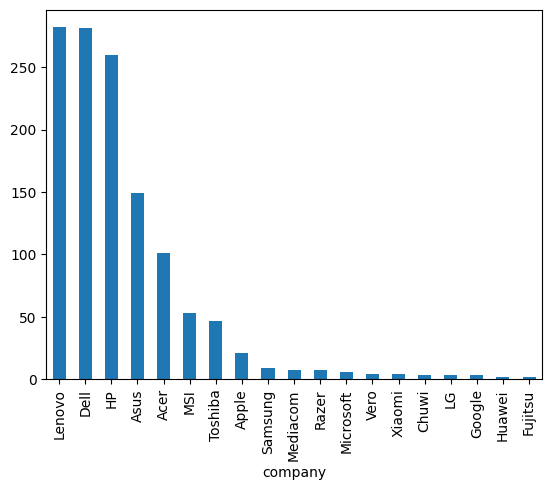

In [179]:
laptopDF['company'].value_counts().plot(kind='bar')

<Axes: xlabel='typename'>

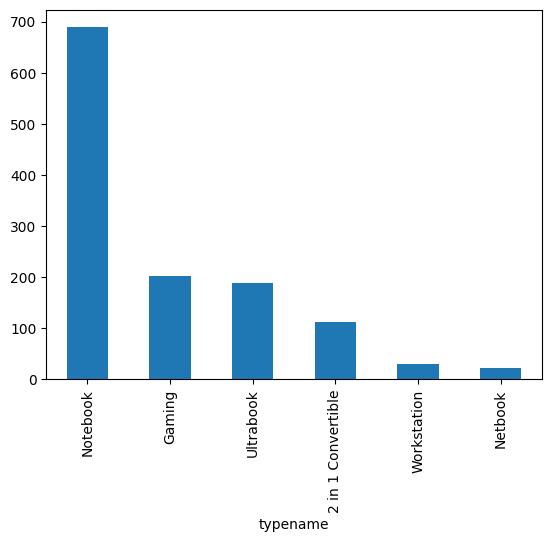

In [180]:
laptopDF['typename'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

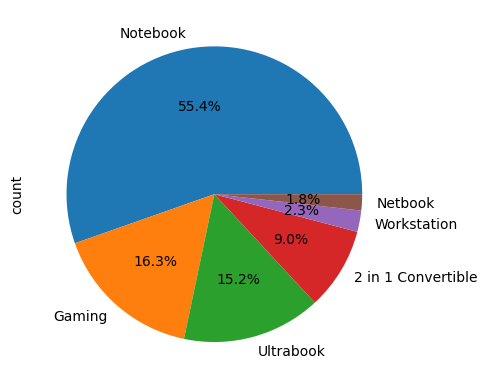

In [181]:
laptopDF['typename'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
sns.displot(data=laptopDF,x='inches',kind='hist',kde=True,height=5, aspect=1.5b)

SyntaxError: invalid decimal literal (3592869964.py, line 1)

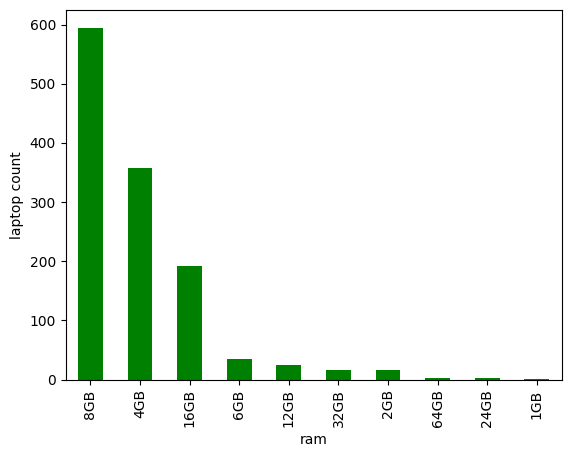

In [ ]:
laptopDF['ram'].value_counts().plot(kind='bar',color='green')
plt.ylabel('laptop count')
plt.show()

<Axes: ylabel='count'>

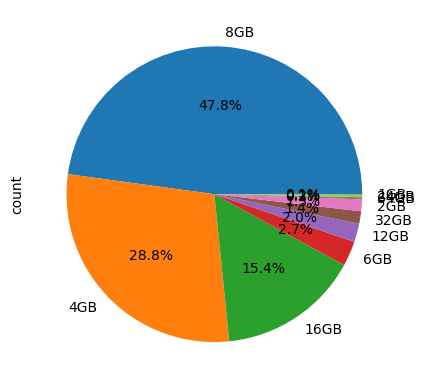

In [ ]:
laptopDF['ram'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [184]:
plt.axvline(laptopDF['weight'].mean(),color='red',linestyle='dashed',label=np.round(laptopDF['weight'].mean(),2))
plt.axvline(laptopDF['weight'].median(),color='yellow',linestyle='dashed',label=np.round(laptopDF['weight'].median(),2))
label=np.round(laptopDF['weight'].mean(),2)
plt.legend()
plt.show()

TypeError: Could not convert string '1.37kg1.34kg1.86kg1.83kg1.37kg2.1kg2.04kg1.34kg1.3kg1.6kg1.86kg1.86kg1.83kg2.2kg0.92kg1.37kg2.2kg1.83kg2.2kg1.22kg2.5kg1.86kg1.62kg1.91kg2.3kg1.35kg2.2kg1.88kg2.5kg1.89kg1.65kg2.71kg1.2kg1.35kg1.44kg2.1kg2.8kg1.86kg2.1kg2kg2.65kg2.3kg2.2kg2.77kg1.37kg3.2kg2.3kg2.8kg2.2kg1.86kg1.49kg2.4kg2.13kg1.91kg2kg2.43kg2kg2.8kg1.7kg1.7kg1.4kg1.86kg1.8kg1.86kg1.44kg1.9kg3kg1.252kg1.4kg2.2kg2.7kg2.1kg2.2kg2.2kg2.02kg2.2kg2.5kg1.88kg0.92kg1.63kg2.2kg2.1kg2.65kg1.83kg1.96kg2.2kg1.21kg2.45kg2.2kg1.49kg2.65kg1.25kg1.5kg2.2kg2.2kg2kg2.62kg1.91kg2.1kg2.2kg1.38kg1.252kg1.58kg1.85kg1.3kg2.2kg1.58kg1.5kg1.23kg1.37kg1.63kg1.21kg1.63kg2.16kg2kg1.7kg2.1kg1.8kg2.2kg2.5kg2.1kg1.63kg1.65kg2.8kg2.5kg2.36kg2.2kg1.6kg7.2kg2.05kg1.63kg1.9kg3kg2.2kg1.32kg3kg1.75kg2.4kg2.1kg1.86kg1.25kg0.97kg2kg2.1kg2.56kg2.62kg1.9kg2.8kg1.48kg1.91kg1.74kg1.1kg1.56kg2.1kg2.03kg3kg2.13kg2.5kg2.1kg2.4kg2.1kg2.56kg3kg1.49kg1.05kg2.71kg2.2kg5.4kg2.5kg2.3kg2.1kg4.4kg1.90kg1.29kg2.02kg1.23kg1.4kg2.0kg1.95kg2.77kg2.06kg2.4kg1.12kg2.8kg1.3kg1.3kg2.8kg1.62kg2.5kg3.49kg1.49kg3.35kg2.5kg2.65kg2.1kg2.23kg3.2kg2.8kg2.4kg2.3kg1.21kg?2.4kg2.9kg2.1kg2.2kg1.05kg1.4kg2.8kg1.63kg1.6kg1.62kg2.2kg1.74kg1.2kg2.1kg4.42kg2.2kg2.3kg2kg2.69kg1.9kg2.37kg2.1kg3.2kg1.6kg1.6kg2.36kg2.1kg2.2kg4.7kg2.5kg7.2kg2.1kg2.69kg2.56kg1.38kg2.2kg2.04kg3.6kg1.49kg1.37kg2.08kg4.3kg1.68kg1.37kg3kg1.41kg1.91kg2.9kg4.14kg2kg2.8kg2.2kg2.1kg2.18kg2.24kg2.67kg4.1kg2.5kg2.05kg1.37kg3.2kg2.14kg1.36kg2.2kg2.3kg2.8kg2.2kg2.8kg2.8kg2.8kg2.25kg2.5kg2.2kg3kg2.15kg1.95kg1.7kg2.5kg2.2kg2.19kg3kg2.54kg2kg2.05kg3.2kg2.5kg3.42kg2.4kg1.63kg1.3kg2.9kg5.8kg2.2kg2.5kg2.2kg1.28kg2.2kg2.3kg1.86kg1.1kg1.21kg2.8kg2.23kg1.1kg2.33kg1.29kg1.45kg1.95kg1.4kg1.48kg2.79kg2kg2.1kg2.2kg1.44kg8.23kg1.7kg1.26kg2.06kg2.7kg2.0kg2kg1.85kg2.5kg1.48kg1.84kg2kg2kg2.2kg2.2kg2.1kg1.4kg1.2kg2.4kg1.44kg1.88kg1.5kg0.0002kg1.84kg2.7kg2.6kg2.4kg2.02kg2.2kg2.65kg2.36kg1.36kg1.86kg2kg2.8kg1.86kg2.2kg2.04kg2.8kg2.4kg2.33kg1.36kg2.26kg2.1kg3.25kg2.6kg1.62kg1.91kg1.59kg1.8kg1.5kg2.4kg3.35kg1.85kg2.3kg1.5kg1.1kg1.13kg1.5kg2.23kg2kg1.42kg3kg3kg2.2kg2.7kg2.33kg1.91kg2.1kg1.9kg1.78kg1.13kg2.2kg2.9kg2.1kg2.5kg2.8kg1.10kg1.2kg1.36kg2.2kg1.15kg2.67kg1.7kg2.1kg1.6kg1.27kg2.3kg1.65kg1.43kg2.14kg1.75kg2kg1.4kg2.31kg2.3kg4.42kg2.62kg2.02kg1.6kg3.35kg1.16kg1.15kg1.4kg1.7kg2.3kg2.5kg3.2kg2.1kg1.1kg1.32kg2kg2.8kg2.2kg1.36kg2.2kg2.2kg1.64kg2.4kg2.23kg2.2kg1.25kg1.91kg2.17kg2.31kg1.65kg2.36kg1.47kg4.42kg1.252kg1.25kg2.5kg2.23kg1.4kg2.37kg1.5kg2.67kg2kg2.2kg2.02kg3.78kg1.4kg1.29kg1.9kg1.1kg1.42kg2.06kg1.79kg1.78kg1.7kg1.05kg2.16kg2.18kg1.49kg1.89kg2.3kg1.75kg2.17kg2.06kg1.36kg0.91kg2.3kg1.05kg1.99kg2.2kg4.33kg1.3kg2.17kg1.48kg1.4kg2.3kg1.2kg1.91kg1.4kg2.1kg1.25kg1.44kg2kg2.2kg1.34kg2.4kg1.29kg2.2kg2.18kg2.2kg1.95kg1.1kg2.04kg2.24kg2.04kg3kg3.2kg1.32kg1.64kg1.63kg2.8kg2.02kg2.2kg2.2kg2.3kg1.9kg4.42kg2.0kg2kg1.2kg2.3kg1.93kg2.2kg1.86kg2.62kg1.87kg1.2kg1.6kg1.34kg2.4kg2kg2.1kg1.87kg2.15kg1.86kg1.99kg2.2kg1.9kg4.42kg2.65kg2.63kg2kg1.35kg2.8kg1.91kg2.18kg1.25kg2.05kg1.16kg3.4kg2.5kg1.21kg1.93kg2.2kg2.02kg3.14kg1.94kg1.95kg2.3kg2.05kg1.4kg1.24kg4.6kg4.14kg2.2kg1.45kg1.9kg1.49kg1.93kg1.26kg4.5kg3.78kg8.4kg2.2kg2.73kg2.2kg2.2kg1.39kg2.5kg2.8kg2.29kg1.37kg1.7kg1.34kg2.06kg1.84kg2.1kg1.6kg4.14kg2.18kg1.8kg2.2kg2.4kg2kg1.6kg2.5kg2.59kg2.18kg2.25kg1.93kg3kg1.84kg2.94kg1.25kg2.31kg1.65kg2.2kg2.2kg1.88kg1.4kg2.2kg1.5kg11.1kg2.62kg1.8kg2.2kg2kg1.99kg1.23kg1.42kg1.37kg2.06kg2.5kg2.6kg1.14kg2.5kg2.4kg1.43kg1.8kg1.95kg1.2kg1.36kg3.8kg2.4kg1.2kg2.2kg1.86kg2.0kg6.2kg2.2kg3.31kg4.42kg1.56kg2.2kg2.2kg2.04kg2.7kg2.1kg2.1kg2.0kg2.1kg1.252kg1.90kg1.3kg2.2kg1.63kg2.4kg1.1kg1.4kg1.09kg2.5kg2.2kg1.86kg3.21kg2.5kg1.19kg3.49kg1.86kg2.2kg2.65kg2.1kg1.45kg1.7kg3.14kg1.42kg1.5kg1.4kg1.38kg1.2kg1.36kg2.56kg2.2kg2.2kg2.1kg1.90kg2.18kg1.6kg2.18kg1.8kg2.71kg2.5kg1.64kg1.98kg1.5kg1.93kg1.87kg1.9kg2.19kg1.4kg2.63kg1.17kg1.58kg1.32kg4.36kg2.7kg1.9kg1.71kg2.32kg2.1kg4.2kg2.25kg2.1kg2.4kg1.44kg1.85kg2.6kg1.55kg1.8kg2.4kg2.0kg2kg1.25kg1.7kg2.5kg1.68kg0.81kg1.6kg3kg1.4kg1.84kg2.45kg2.37kg1.3kg2.2kg2.59kg4.42kg2.1kg2.5kg1.18kg1.1kg1.2kg1.65kg1.6kg2.8kg2.72kg1.31kg2.1kg2.3kg1.71kg1.75kg2.62kg2.3kg2.5kg1.8kg1.95kg2kg4.42kg4.3kg1.47kg2.2kg1.7kg1.6kg2.2kg2.4kg4.2kg2.62kg2.24kg1.22kg1.37kg2.08kg0.920kg1.42kg1.63kg1.95kg1.38kg2kg3.14kg2.37kg1.29kg2.06kg1.63kg1.26kg2.1kg2.04kg2.62kg2.4kg3.74kg2.9kg0.81kg1.98kg2.18kg1.32kg1.29kg1.23kg4.36kg1.76kg2.1kg1.25kg1.13kg2.4kg1.13kg1.75kg1.1kg1.76kg1.35kg1.5kg3.49kg1.1kg2.1kg1.7kg1.32kg3.21kg2.9kg2.0kg1.5kg2.3kg2.73kg4.42kg2.63kg2.18kg1.54kg2.18kg1.4kg1.45kg1.28kg1.54kg1.86kg2.1kg2.83kg1.96kg2.3kg1.9kg2kg1.28kg1.62kg2.2kg2.3kg1.84kg1.05kg2.5kg1.29kg2.07kg1.2kg1.37kg1.56kg2.23kg2.38kg2.2kg2.0kg1.44kg1.23kg1.6kg2kg1.28kg2.18kg2.04kg1.28kg2.3kg1.65kg2.2kg2.2kg1.28kg2.18kg2.2kg1.25kg2.8kg1.95kg1.42kg1.17kg1.32kg2.43kg1.05kg2.62kg2.04kg2.18kg1.9kg1.24kg3.58kg1.22kg1.13kg1.95kg1.08kg1.26kg2.20kg2.6kg0.98kg1.6kg1.09kg2.2kg2.04kg2.4kg1.44kg1.49kg2.7kg2.6kg2.2kg2.18kg1.84kg1.37kg1.95kg1.36kg2.31kg2.18kg1.95kg2.2kg1.26kg1.86kg1.3kg1.47kg1.26kg2.18kg2.2kg4.36kg2.75kg2.8kg2.23kg2.2kg1.1kg2.5kg1.36kg2.2kg2.36kg1.68kg2.0kg1.36kg1.2kg1.2kg1.7kg4.36kg1.24kg1.45kg1.3kg1.25kg1.2kg1.36kg2.4kg1.1kg2.04kg2.25kg1.9kg2.04kg4.42kg2.4kg1.22kg1.5kg4.42kg1.95kg2.73kg2.04kg1.70kg2.3kg2.99kg2.19kg1.2kg2.2kg2.3kg1.75kg2.25kg2.04kg2.5kg2.36kg1.6kg0.97kg2.1kg1.9kg2.3kg1.4kg1.11kg2.4kg2.5kg1.48kg2.7kg1.34kg2.18kg1.64kg1.2kg1.48kg1.95kg1.43kg1.64kg1.64kg2.65kg1.26kg1.48kg1.54kg1.49kg1.5kg2.04kg2.4kg1.47kg1.43kg2.08kg1.2kg1.11kg1.64kg2.09kg1.26kg2.31kg1.95kg1.29kg2.63kg1.64kg2.1kg2.7kg1.95kg1.84kg1.26kg2.04kg1.47kg2.09kg1.64kg1.8kg1.45kg2.4kg2.3kg1.54kg1.84kg1.43kg3.78kg4.6kg1.2kg1.1kg1.91kg2.3kg2.04kg1.2kg2.31kg1.96kg2.4kg1.6kg2.94kg4kg2.25kg2.32kg1.8kg1.29kg3.58kg1.62kg3.21kg0.920kg2.06kg2.31kg1.26kg1.49kg1.3kg3.0kg2.3kg3.78kg2.1kg2.31kg0.99kg4.6kg0.69kg1.3kg2.18kg1.54kg1.9kg1.7kg1.29kg2.4kg2.2kg1.86kg2.7kg1.4kg2.4kg2.4kg2.36kg2.6kg1.96kg4.3kg1.5kg1.5kg2.20kg3.0kg2.4kg1.5kg2.9kg2.1kg2.1kg2.59kg1.16kg2.24kg2.1kg1.16kg0.69kg1.23kg4.6kg1.25kg1.05kg3.52kg1.35kg1.16kg1.43kg2.09kg2kg1.8kg0.69kg1.26kg2.4kg3.35kg2.04kg1.8kg1.5kg1.84kg2.23kg2.5kg3kg2.5kg3.78kg1.88kg2.8kg2.4kg1.48kg2.59kg1.48kg2.0kg1.26kg2.18kg1.88kg1.27kg1.9kg1.86kg2.32kg2.62kg2.04kg1.91kg2.7kg1.4kg2.5kg1.48kg1.7kg1.7kg2.62kg2.2kg2.1kg2.62kg1.95kg2.2kg1.44kg2.2kg1.96kg2.1kg2.2kg2.1kg2.2kg2kg2.32kg3.31kg1.91kg2.07kg1.36kg1.54kg1.98kg2.1kg2.18kg2.591kg2.09kg2.23kg1.23kg4.2kg2.4kg1.15kg1.86kg0.920kg1.6kg2.21kg1.9kg4.3kg2.1kg2.43kg2.3kg2.2kg1.2kg2.2kg2.36kg1.91kg2.2kg3.3kg2.2kg0.920kg2.2kg2.43kg2.191kg2.9kg1.3kg3.3kg2.8kg2.6kg1.2kg2.3kg2.2kg2.1kg1.26kg2.08kg2.65kg1.29kg2.18kg2.6kg2.2kg1.3kg1.95kg2.3kg2.7kg1.08kg2.1kg1.54kg2.24kg2.3kg1.4kg2.2kg1.45kg2.4kg2.77kg1.54kg1.6kg2.34kg2.3kg1.24kg2.2kg1.86kg2.4kg1.9kg2.2kg2kg4.0kg2.29kg2.32kg2.4kg1.8kg1.2kg2.3kg2.4kg2.20kg2.6kg2.04kg2.3kg1.17kg2.2kg1.8kg1.3kg1.5kg2.19kg' to numeric

Bivariate analysis

<Axes: >

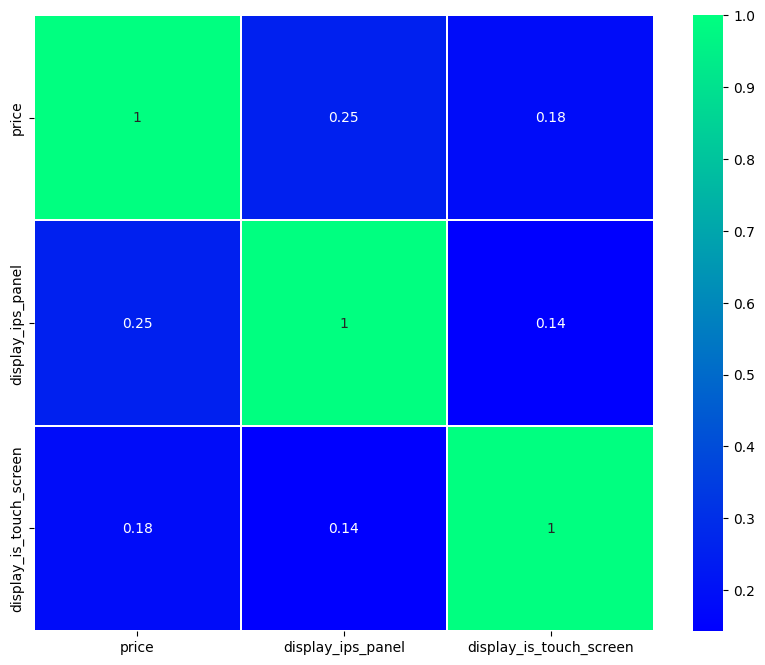

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(laptopDF.select_dtypes(include=[np.float64,np.int64,bool]).corr(),cmap='winter',annot=True,linewidths=0.2)

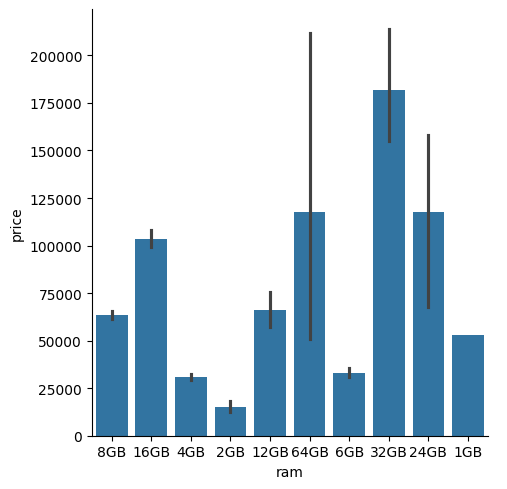

In [185]:
#numerical - categorical
#price - ram 
sns.catplot(kind='bar',data=laptopDF,x='ram',y='price')

In [188]:
laptopDF = laptopDF.sort_values(by='ram', ascending=True)

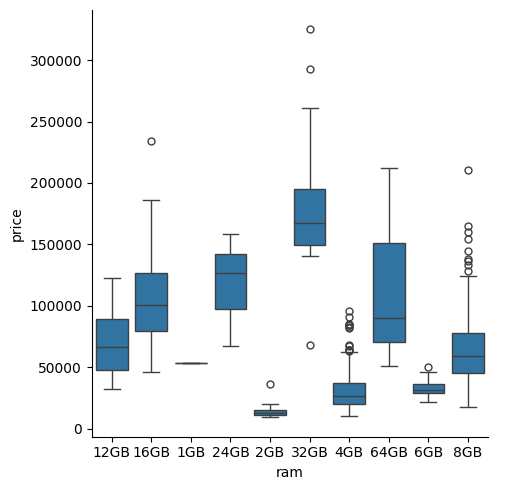

In [189]:
sns.catplot(kind='box',data=laptopDF,x='ram',y='price')

<Axes: xlabel='ram', ylabel='price'>

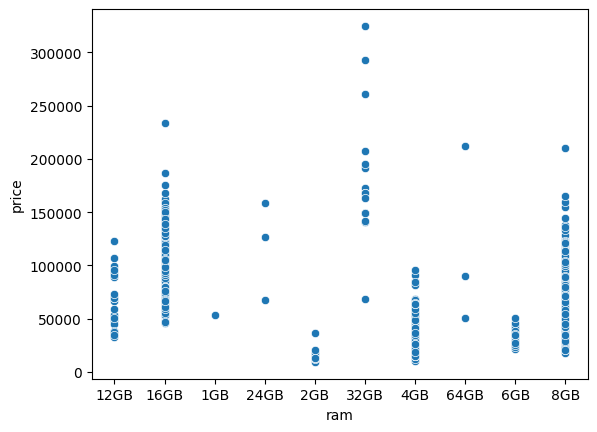

In [190]:
sns.scatterplot(data=laptopDF,x='ram',y='price')